In [1]:
from __future__ import division

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
arange = np.arange
pi = np.pi
sin = np.sin
cos = np.cos


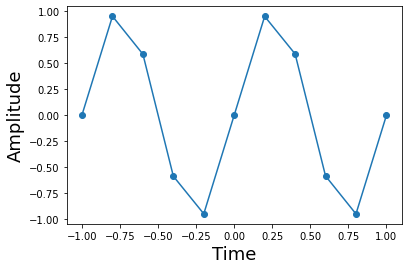

In [3]:
fig,ax = plt.subplots()
pi = 3.14
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
t = np.arange(-1,1+1/fs,1/fs) # sample interval, symmetric
# for convenience later
x = np.sin(2*pi*f*t)
ax.plot(t,x,"o-")
ax.set_xlabel("Time",fontsize=18);
ax.set_ylabel("Amplitude",fontsize=18);

Text(0, 0.5, 'Amplitude')

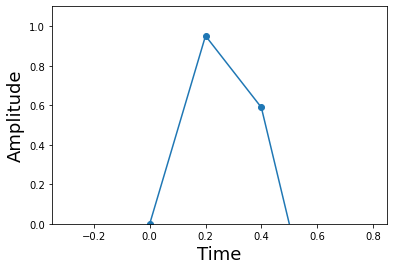

In [4]:
fig,ax = plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
    xmax = 1/(4*f)+1/fs*3,
    ymin = 0,
    ymax = 1.1 )

ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

In [5]:
interval = [] # piecewise domains
apprx = [] # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i],t[i + 1],20,False) for i in range(len(t) - 1)])
# construct arguments for piecewise
for i in range(len(t) - 1):
    interval.append(np.logical_and(t[i] <= tp,tp < t[i + 1]))

apprx.append((x[i + 1] - x[i]) / (t[i + 1] - t[i]) * (tp[interval[-1]] - t[i]) + x[i])

x_hat = np.piecewise(tp, interval[0], apprx) # piecewise linear approximation


In [6]:
interval[0].shape

(200,)

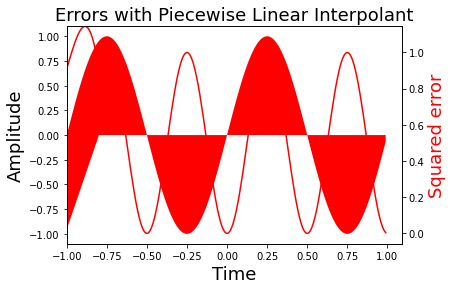

In [7]:
fig,ax1 = plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2 * pi * f * tp),facecolor='red')
ax1.set_xlabel('Time',fontsize = 18)
ax1.set_ylabel('Amplitude',fontsize = 18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat - np.sin(2 * pi * f * tp)) ** 2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max())
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18);

Text(0.5, 1.0, 'Sampling Rate=5.00 Hz')

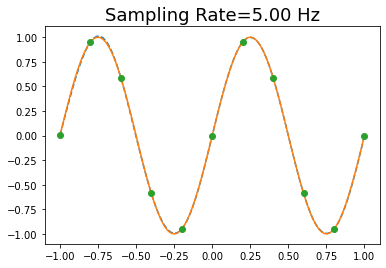

In [10]:
fig,ax=plt.subplots()
t = np.linspace(-1,1,100) # redefine this here for convenience
ts = np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts)
sm=0
for k in range(-num_coeffs,num_coeffs):
    # since function is real, need both sides
    sm+=np.sin(2*pi*(k/fs))*np.sinc(k - fs*t)

ax.plot(t,sm,'--',t,np.sin(2*pi*t),ts, np.sin(2*pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )

Text(0.5, 1.0, 'Errors with Whittaker Interpolant')

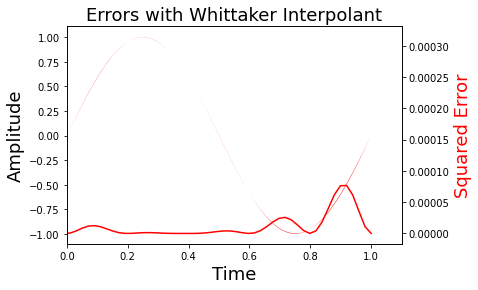

In [11]:
fig,ax1 = plt.subplots()
ax1.fill_between(t,sm,np.sin(2 * pi * f * t),facecolor='red')
ax1.set_ylabel('Amplitude',fontsize = 18)
ax1.set_xlabel('Time',fontsize = 18)
ax2 = ax1.twinx()
sqe = (sm - np.sin(2 * pi * f * t)) ** 2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
ax1.set_title(r'Errors with Whittaker Interpolant',fontsize = 18)

Text(-0.9, 0.5, 'no interference here')

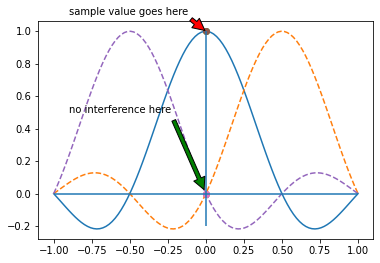

In [13]:
fig,ax = plt.subplots()
k = 0
fs = 2 # makes this plot easier to read
ax.plot(t,np.sinc(k - fs * t),
        t,np.sinc(k + 1 - fs * t),'--',k / fs,1,'o',(k) / fs,0,'o',
        t,np.sinc(k - 1 - fs * t),'--',k / fs,1,'o',(-k) / fs,0,'o')
ax.hlines(0,-1,1) # horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
        xy=(0,1), # arrowhead position
        xytext=(-1 + .1,1.1),# text position
arrowprops={'facecolor':'red',
        'shrink':0.05},)
ax.annotate('no interference here',
        xy = (0,0),
        xytext = (-1 + .1,0.5),
        arrowprops = {'facecolor':'green','shrink':0.05},)

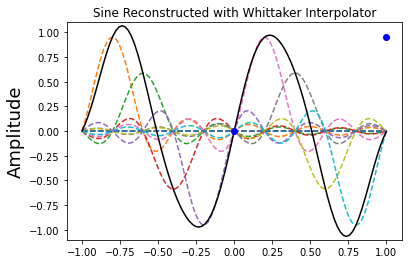

In [16]:
fs = 5.0 # sampling rate
k = np.array(sorted(set((t * fs).astype(int)))) # sorted coefficient list
fig,ax = plt.subplots()
ax.plot(t,(np.sin(2 * pi * (k[:,None] / fs)) * np.sinc(k[:,None] - fs * t)).T,'--',
     # individual whittaker functions
    t,(np.sin(2 * pi * (k[:,None] / fs)) * np.sinc(k[:,None] - fs * t)).
    sum(axis=0),'k-', # whittaker interpolant k/fs,
    np.sin(2 * pi * k / fs),'ob')# samplesax.set_xlabel('Time',fontsize = 18)
ax.set_ylabel('Amplitude',fontsize = 18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

Text(3.1, 0.5, '... and going...')

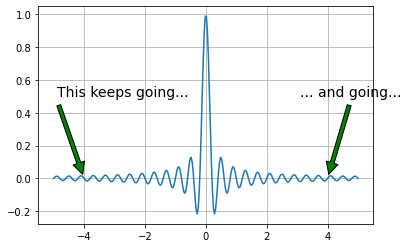

In [17]:
t = np.linspace(-5,5,300) # redefine this here for convenience
fig,ax = plt.subplots()

fs = 5.0 # sampling rate
ax.plot(t,np.sinc(fs * t))
ax.grid() # put grid on axes
ax.annotate('This keeps going...',
    xy=(-4,0),
    xytext=(-5 + .1,0.5),
    arrowprops={'facecolor':'green',
        'shrink':0.05},
    fontsize=14)
ax.annotate('... and going...',
    xy=(4,0),
    xytext=(3 + .1,0.5),
    arrowprops={'facecolor':'green',
        'shrink':0.05},
    fontsize=14)

In [22]:
from LAPACK import eigvlash

ModuleNotFoundError: No module named 'LAPACK'

In [19]:
# compute max eigenvalue
import numpy as np
from scipy.linalg import eigvalsh,eigvals,eigh,eig
from scipy import sign

import matplotlib.pyplot as plt
def max_eig(A):
    """Compute the maximum eigenvalue of a matrix"""
    return np.max(np.linalg.eigvals(A))
    # return np.max(np.abs(eigvlash(A)))

A = np.array([[1,2],[3,4]])
print(max_eig(A))

5.372281323269014


C:\Users\oeb\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


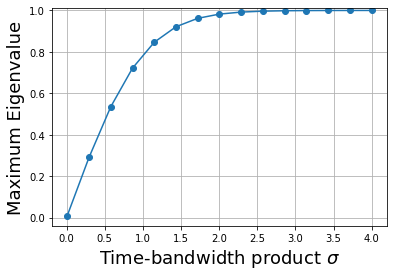

In [8]:
def kernel(x,sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x) # ensure x is array
    y = pi * np.where(x == 0,1.0e-20, x)# avoid divide by zero
    return sin(sigma / 2 * y) / y

nstep = 100 # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
dt = np.diff(t)[0] # differential step size

def eigv(sigma):
    return np.linalg.eigvals(kernel(t - t[:,None],sigma)).max()
    # (kernel(t - t[:,None],sigma)).max()
    # return np.eigvalsh(kernel(t - t[:,None],sigma)).max() # compute max eigenvalue

sigma = np.linspace(0.01,4,15) # range of time-bandwidth products to consider
fig,ax = plt.subplots()
ax.plot(sigma, dt * np.array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('Time-bandwidth product $\sigma$',fontsize = 18)
ax.set_ylabel('Maximum Eigenvalue',fontsize=18)
ax.axis(ymax=1.01)
ax.grid()

Text(0.5, 1.0, 'Eigenvector corresponding to e-value=0.9990;$\\sigma$=3.00')

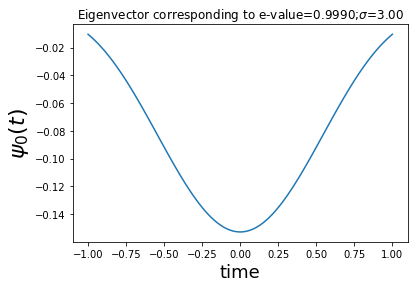

In [11]:
sigma=3
w,v=eigh(kernel(t-t[:,None],sigma))
maxv=v[:, w.argmax()]
fig,ax=plt.subplots()
ax.plot(t,maxv)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvector corresponding to e-value=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))

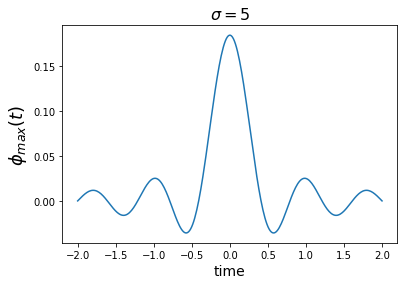

In [36]:

def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = pi* np.where(x == 0,1.0e-20, x)
    return sin(2*W*y)/y

nstep=300                # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
tt = np.linspace(-2,2,nstep)# extend interval

sigma = 5
W = sigma/2./2./t.max()

w,v=eig(kernel_tau(t-tt[:,None],W))
ii = np.argsort(w.real) 
maxv=v[:, w.real.argmax()].real
fig,ax = plt.subplots()
# scipy.sign is deprecated and will be removed in
#  SciPy 2.0.0, use numpy.sign instead
z = np.sign(maxv[int(nstep//2)])
z = maxv/z
ax.plot(tt,z) # normalize to keep orientation upwards
ax.set_xlabel('time',fontsize=14)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=18)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=16);